In [ ]:
# !pip install backtrader# 
# !pip install pyarrow

In [ ]:
from datetime import datetime

In [1]:
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt


In [14]:
feather_file_path = Path(os.getcwd()).parent/'data'/'binance'/'futures'/'BTC_USDT_USDT-5m-futures.feather'
# feather_file_path = Path(os.getcwd())/'BTC_USDT-1h.feather'
# feather_file_path = Path(os.getcwd())/'BTC_USDT-5m.feather'

In [15]:
df = pd.read_feather(feather_file_path)
df.set_index('date', inplace=True)

In [16]:
df['range'] = df['high'] - df['low']
df['previous_range'] = df['range'].shift(1)
df['open-low'] = df['open'] - df['low']
df['open-low_range_ratio']=df['open-low']/df['previous_range']

df.dropna(subset=['open-low_range_ratio','previous_range'], 
        inplace=True)
df['price_move'] = df['close'] - df['open']

In [17]:
# df['open-low_ratio'] = df['open-low_range_ratio'].abs()
# filtered_df = df[(df['open-low_range_ratio'] >= -10)&(df['open-low_range_ratio']<=10)]
filtered_df = df[(df['open-low_range_ratio']<=1)]

Text(0, 0.5, 'Distribution of Price Move')

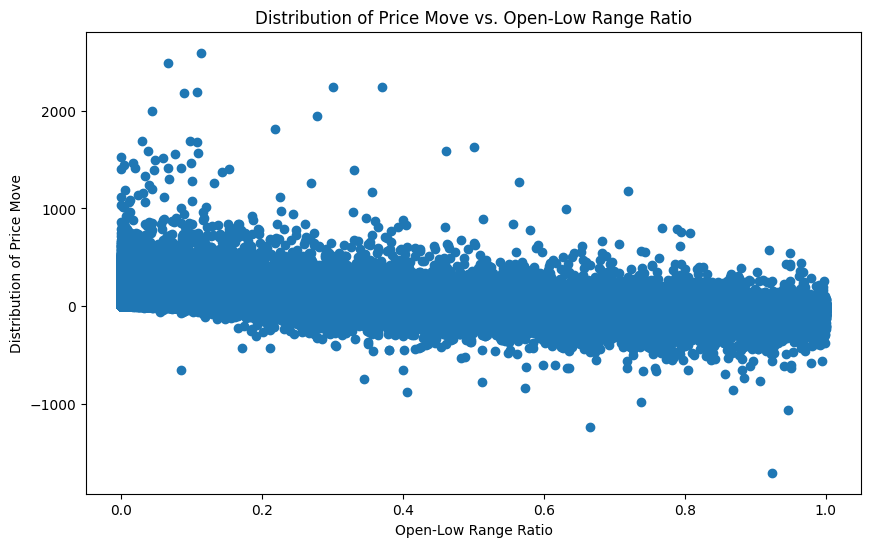

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(filtered_df['open-low_range_ratio'],filtered_df['price_move'],alpha=1.0)
# plt.scatter(df['open-low_range_ratio'],df['price_move'],alpha=0.9)

plt.title('Distribution of Price Move vs. Open-Low Range Ratio')
plt.xlabel('Open-Low Range Ratio')
plt.ylabel('Distribution of Price Move')